In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
DATASETPATH ='/content/gdrive/My Drive/US_Accidents_June20 2.csv'

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [3]:
dataset = pd.read_csv(DATASETPATH,nrows=100000,skiprows=[i for i in range(1,2400000)])



In [4]:
#Feature Extraction 1
from datetime import datetime
fmt = '%Y-%m-%d %H:%M:%S'
for ind, row in dataset.iterrows():
  tstamp1 = datetime.strptime(row['Start_Time'], fmt)
  tstamp2 = datetime.strptime(row['End_Time'], fmt)
  differenza = tstamp2 - tstamp1
  minuti = int(round(differenza.total_seconds() / 60))
  dataset.loc[ind, "Time_Diff_minuti"] = minuti

In [5]:
#Feature Extraction 2.1
numNotNanLat = 0
numNotNanLng = 0
sumDistancesLat = 0
sumDistancesLng = 0
for ind, row in dataset.iterrows():
  if math.isnan(row['End_Lat']) == False:
    dataset.loc[ind, "Lat_Diff"] = row['End_Lat'] - row['Start_Lat']
    numNotNanLat += 1
    sumDistancesLat += dataset.loc[ind, "Lat_Diff"]

  if math.isnan(row['End_Lng']) == False:
    dataset.loc[ind, "Lng_Diff"] = row['End_Lng'] - row['Start_Lng']
    numNotNanLng += 1
    sumDistancesLng += dataset.loc[ind, "Lng_Diff"]

In [6]:
#Feature Extraction 2.2
averageLat = sumDistancesLat/numNotNanLat
averageLng = sumDistancesLng/numNotNanLng
for ind, row in dataset.iterrows():
  if math.isnan(row['Lat_Diff']) == True:
   dataset.loc[ind,'Lat_Diff'] = averageLat

  if math.isnan(row['Lng_Diff']) == True:
   dataset.loc[ind,'Lng_Diff'] = averageLng 

In [7]:
#Coversione object e booleani 
dataset['ID'] = dataset['ID'].astype('category').cat.codes
dataset['Source'] = dataset['Source'].astype('category').cat.codes
dataset['Start_Time'] = dataset['Start_Time'].astype('category').cat.codes
dataset['End_Time'] = dataset['End_Time'].astype('category').cat.codes
dataset['Description'] = dataset['Description'].astype('category').cat.codes
dataset['Street'] = dataset['Street'].astype('category').cat.codes
dataset['Side'] = dataset['Side'].astype('category').cat.codes
dataset['City'] = dataset['City'].astype('category').cat.codes
dataset['County'] = dataset['County'].astype('category').cat.codes
dataset['State'] = dataset['State'].astype('category').cat.codes
dataset['Zipcode'] = dataset['Zipcode'].astype('category').cat.codes
dataset['Country'] = dataset['Country'].astype('category').cat.codes
dataset['Timezone'] = dataset['Timezone'].astype('category').cat.codes
dataset['Airport_Code'] = dataset['Airport_Code'].astype('category').cat.codes
dataset['Weather_Condition'] = dataset['Weather_Condition'].astype('category').cat.codes
dataset['Amenity'] = dataset['Amenity'].astype('uint8')
dataset['Bump'] = dataset['Bump'].astype('uint8')
dataset['Crossing'] = dataset['Crossing'].astype('uint8')
dataset['Give_Way'] = dataset['Give_Way'].astype('uint8')
dataset['Junction'] = dataset['Junction'].astype('uint8')
dataset['No_Exit'] = dataset['No_Exit'].astype('uint8')
dataset['Railway'] = dataset['Railway'].astype('uint8')
dataset['Roundabout'] = dataset['Roundabout'].astype('uint8')
dataset['Station'] = dataset['Station'].astype('uint8')
dataset['Stop'] = dataset['Stop'].astype('uint8')
dataset['Traffic_Calming'] = dataset['Traffic_Calming'].astype('uint8')
dataset['Traffic_Signal'] = dataset['Traffic_Signal'].astype('uint8')
dataset['Sunrise_Sunset'] = dataset['Sunrise_Sunset'].astype('category').cat.codes
dataset['Civil_Twilight'] = dataset['Civil_Twilight'].astype('category').cat.codes
dataset['Nautical_Twilight'] = dataset['Nautical_Twilight'].astype('category').cat.codes
dataset['Astronomical_Twilight'] = dataset['Astronomical_Twilight'].astype('category').cat.codes
dataset

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Diff_minuti,Lat_Diff,Lng_Diff
0,0,1,201.0,2,84378,84247,45.033367,-93.400681,NaN,NaN,1.170,41957,NaN,2087,1,2727,433,21,17613,0,0,851,2017-09-26 07:31:00,57.0,NaN,87.0,29.92,10.0,WNW,4.6,0.01,28,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,59.0,0.000159,0.000119
1,1,1,201.0,3,84390,84256,45.069134,-93.278961,NaN,NaN,1.220,23467,NaN,7390,1,2727,31,21,17603,0,0,851,2017-09-26 07:31:00,57.0,NaN,87.0,29.92,10.0,WNW,4.6,0.01,28,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,60.0,0.000159,0.000119
2,2,1,201.0,3,84442,84297,45.044796,-93.106300,NaN,NaN,1.730,23479,NaN,17720,1,3751,797,21,17520,0,0,96,2017-09-26 07:50:00,57.2,NaN,100.0,29.92,10.0,WNW,3.5,NaN,28,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,59.0,0.000159,0.000119
3,3,1,201.0,3,84464,84313,45.068661,-93.263481,NaN,NaN,1.250,23468,NaN,22507,1,2727,31,21,17603,0,0,851,2017-09-26 07:53:00,57.0,NaN,89.0,29.92,10.0,West,5.8,0.01,19,0,0,0,0,0,0,0,0,0,0,0,0,False,0,0,0,0,60.0,0.000159,0.000119
4,4,1,201.0,2,84523,84363,45.082928,-93.402077,NaN,NaN,1.510,41933,NaN,22269,1,2727,433,21,17615,0,0,851,2017-09-26 07:53:00,57.0,NaN,89.0,29.92,10.0,West,5.8,0.01,19,0,0,0,0,1,0,0,0,0,0,0,0,False,0,0,0,0,59.0,0.000159,0.000119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,NaN,2,12548,12553,29.452709,-98.612524,29.452650,-98.613751,0.074,48748,6304.0,292,0,3779,90,41,23840,0,0,1222,2016-11-25 18:58:00,64.8,NaN,81.0,30.28,10.0,NE,8.1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,False,1,1,1,1,360.0,-0.000059,-0.001227
99996,99996,0,NaN,2,12547,12552,32.776320,-96.624100,32.784970,-96.624310,0.598,51003,NaN,11687,1,2671,256,41,21606,0,0,621,2016-11-25 18:50:00,53.6,NaN,62.0,30.38,10.0,Calm,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,False,1,1,1,1,360.0,0.008650,-0.000210
99997,99997,0,NaN,2,12548,12553,29.452650,-98.613751,29.452709,-98.612524,0.074,48748,6365.0,292,1,3779,90,41,23843,0,0,1222,2016-11-25 18:58:00,64.8,NaN,81.0,30.28,10.0,NE,8.1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,False,1,1,1,1,360.0,0.000059,0.001227
99998,99998,0,NaN,2,12549,12554,30.222808,-97.764011,30.221970,-97.764560,0.067,54149,NaN,18625,1,179,974,41,24075,0,0,119,2016-11-25 19:21:00,57.9,NaN,87.0,30.38,9.0,North,5.8,NaN,28,0,0,0,0,0,0,0,0,0,0,0,0,False,1,1,1,1,360.0,-0.000838,-0.000549


In [ ]:
#Correlazione feature e target
dataset.corr()['Severity']

In [8]:
#Filtraggio feature booleane
bool_array = ['Amenity', 'Bump',	'Crossing',	'Give_Way',	'Junction',	'No_Exit',	'Railway',	'Roundabout',	'Station',	'Stop',	'Traffic_Calming',	'Traffic_Signal',	'Turning_Loop']
for i in bool_array:
 if (dataset[i].sum()) == 0:
  dataset = dataset.drop(i,axis=1)

In [ ]:
#Filtraggio feature non logicamente utili
dataset = dataset.drop(['ID','Source','Start_Time',	'End_Time',	'Start_Lat',	'Start_Lng',	'End_Lat',	'End_Lng','Description','Number','Street','Side','Weather_Timestamp','City','County','State','Zipcode','Country','Timezone','Airport_Code','Wind_Direction','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],axis=1)
dataset

In [ ]:
columns = dataset.columns
null_columns = dataset.columns[dataset.isnull().any()]
sum_null_columns = dataset[null_columns].isnull().sum()
print(sum_null_columns)

In [41]:
#Divisione tra Features e Target
X = dataset.drop(['Severity'],axis=1)
y = dataset['Severity']
new_dataset = X
new_dataset

,TMC,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Time_Diff_minuti,Lat_Diff,Lng_Diff
0,201.0,1.170,57.0,NaN,87.0,29.92,10.0,4.6,0.01,28,0,0,0,0,0,0,0,0,0,0,0,0,0,59.0,0.000159,0.000119
1,201.0,1.220,57.0,NaN,87.0,29.92,10.0,4.6,0.01,28,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0.000159,0.000119
2,201.0,1.730,57.2,NaN,100.0,29.92,10.0,3.5,NaN,28,0,0,0,0,0,0,0,0,0,0,0,0,0,59.0,0.000159,0.000119
3,201.0,1.250,57.0,NaN,89.0,29.92,10.0,5.8,0.01,19,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0.000159,0.000119
4,201.0,1.510,57.0,NaN,89.0,29.92,10.0,5.8,0.01,19,0,0,0,0,1,0,0,0,0,0,0,0,0,59.0,0.000159,0.000119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,0.074,64.8,NaN,81.0,30.28,10.0,8.1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,360.0,-0.000059,-0.001227
99996,NaN,0.598,53.6,NaN,62.0,30.38,10.0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,360.0,0.008650,-0.000210
99997,NaN,0.074,64.8,NaN,81.0,30.28,10.0,8.1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,360.0,0.000059,0.001227
99998,NaN,0.067,57.9,NaN,87.0,30.38,9.0,5.8,NaN,28,0,0,0,0,0,0,0,0,0,0,0,0,1,360.0,-0.000838,-0.000549


In [ ]:
#Sostituzione valori null con 0
X = new_dataset.fillna(0)
X

In [42]:
#Sostituzione valori null con media attributo
X = new_dataset.fillna(new_dataset.mean())
X

,TMC,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Time_Diff_minuti,Lat_Diff,Lng_Diff
0,201.000000,1.170,57.0,29.237214,87.0,29.92,10.0,4.600000,0.010000,28,0,0,0,0,0,0,0,0,0,0,0,0,0,59.0,0.000159,0.000119
1,201.000000,1.220,57.0,29.237214,87.0,29.92,10.0,4.600000,0.010000,28,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0.000159,0.000119
2,201.000000,1.730,57.2,29.237214,100.0,29.92,10.0,3.500000,0.077207,28,0,0,0,0,0,0,0,0,0,0,0,0,0,59.0,0.000159,0.000119
3,201.000000,1.250,57.0,29.237214,89.0,29.92,10.0,5.800000,0.010000,19,0,0,0,0,0,0,0,0,0,0,0,0,0,60.0,0.000159,0.000119
4,201.000000,1.510,57.0,29.237214,89.0,29.92,10.0,5.800000,0.010000,19,0,0,0,0,1,0,0,0,0,0,0,0,0,59.0,0.000159,0.000119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,205.928862,0.074,64.8,29.237214,81.0,30.28,10.0,8.100000,0.077207,1,0,0,0,0,0,0,0,0,0,0,0,0,1,360.0,-0.000059,-0.001227
99996,205.928862,0.598,53.6,29.237214,62.0,30.38,10.0,8.207684,0.077207,1,0,0,0,0,0,0,0,0,0,0,0,0,1,360.0,0.008650,-0.000210
99997,205.928862,0.074,64.8,29.237214,81.0,30.28,10.0,8.100000,0.077207,1,0,0,0,0,0,0,0,0,0,0,0,0,1,360.0,0.000059,0.001227
99998,205.928862,0.067,57.9,29.237214,87.0,30.38,9.0,5.800000,0.077207,28,0,0,0,0,0,0,0,0,0,0,0,0,1,360.0,-0.000838,-0.000549


In [ ]:
#RandomUnderSampling
from imblearn.under_sampling import RandomUnderSampler
oversample = RandomUnderSampler()
X, y = oversample.fit_resample(X, y)
plt.hist(y)
X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[ 2.01000000e+02,  1.16999996e+00,  5.70000000e+01, ...,
         5.90000000e+01,  1.58905623e-04,  1.18777206e-04],
       [ 2.01000000e+02,  1.22000003e+00,  5.70000000e+01, ...,
         6.00000000e+01,  1.58905623e-04,  1.18777206e-04],
       [ 2.01000000e+02,  1.73000002e+00,  5.72000000e+01, ...,
         5.90000000e+01,  1.58905623e-04,  1.18777206e-04],
       ...,
       [ 2.05928862e+02,  5.87600000e+00,  6.98000000e+01, ...,
         3.60000000e+02,  8.48930000e-02, -5.85500000e-03],
       [ 2.05928862e+02,  6.85000000e-01,  2.82000000e+01, ...,
         3.60000000e+02,  9.91400000e-03,  7.00000000e-05],
       [ 2.05928862e+02,  1.22100000e+00,  5.70000000e+01, ...,
         3.60000000e+02, -5.11000000e-03, -2.11600000e-02]])

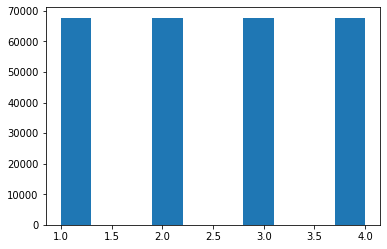

In [43]:
#RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X, y = oversample.fit_resample(X, y)
plt.hist(y)
X

In [ ]:
#Oversampling SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
plt.hist(y)
X


In [ ]:
#Undersampling NearMiss
from imblearn.under_sampling import NearMiss
oversample = NearMiss()
X, y = oversample.fit_resample(X, y)
plt.hist(y)
X

In [ ]:
#Undersampling ClusterCentroids
from imblearn.under_sampling import ClusterCentroids
oversample = ClusterCentroids()
X, y = oversample.fit_resample(X, y)
plt.hist(y)
X

In [ ]:
#Discretizzazione strategy uniform
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X = kbins.fit_transform(X)
X

In [ ]:
#Discretizzazione strategy quantile
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X = kbins.fit_transform(X)
X

In [ ]:
#Discretizzazione strategy kmeans
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
X = kbins.fit_transform(X)
X

In [ ]:
#Feature Selection Kbest con f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestFeatures = SelectKBest(score_func=f_classif,k=5)
fit=bestFeatures.fit(X,y)
KBest= bestFeatures.fit_transform(X,y)
columns_new = bestFeatures.get_support(1)
print(columns_new)
X = X[:,columns_new]
X


In [44]:
#Feature Selection Kbest con mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
bestFeatures = SelectKBest(score_func=mutual_info_classif,k=5)
fit=bestFeatures.fit(X,y)
KBest= bestFeatures.fit_transform(X,y)
columns_new = bestFeatures.get_support(1)
print(columns_new)
X = X[:,columns_new]
X

[ 0  1 23 24 25]


array([[ 2.01000000e+02,  1.16999996e+00,  5.90000000e+01,
         1.58905623e-04,  1.18777206e-04],
       [ 2.01000000e+02,  1.22000003e+00,  6.00000000e+01,
         1.58905623e-04,  1.18777206e-04],
       [ 2.01000000e+02,  1.73000002e+00,  5.90000000e+01,
         1.58905623e-04,  1.18777206e-04],
       ...,
       [ 2.05928862e+02,  5.87600000e+00,  3.60000000e+02,
         8.48930000e-02, -5.85500000e-03],
       [ 2.05928862e+02,  6.85000000e-01,  3.60000000e+02,
         9.91400000e-03,  7.00000000e-05],
       [ 2.05928862e+02,  1.22100000e+00,  3.60000000e+02,
        -5.11000000e-03, -2.11600000e-02]])

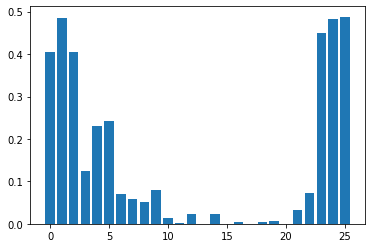

In [45]:
#Grafico Feature Selection
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)
plt.show()

In [64]:
#Creazione Test Set e Training Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
#Valutazione Decision Tree
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
print("Cross Validation:",all_accuracies)
print("Accuracy Mean CV:",all_accuracies.mean())
print("Standard Deviation CV:",all_accuracies.std())
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#LinearSVM
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

In [ ]:
#Valutazione LinearSVM
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5)
print("Cross Validation:",all_accuracies)
print("Accuracy Mean CV:",all_accuracies.mean())
print("Standard Deviation CV:",all_accuracies.std())
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

In [ ]:
#Valutazione KNN
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=5)
print("Cross Validation:",all_accuracies)
print("Accuracy Mean CV:",all_accuracies.mean())
print("Standard Deviation CV:",all_accuracies.std())
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_pred

In [ ]:
#Valutazione GaussianNB
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=gnb, X=X_train, y=y_train, cv=5)
print("Cross Validation:",all_accuracies)
print("Accuracy Mean CV:",all_accuracies.mean())
print("Standard Deviation CV:",all_accuracies.std())
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [65]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred

array([3, 3, 4, ..., 1, 4, 1])

In [ ]:
#Valutazione RandomForest
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5)
print("Cross Validation:",all_accuracies)
print("Accuracy Mean CV:",all_accuracies.mean())
print("Standard Deviation CV:",all_accuracies.std())
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [66]:
#Salvataggio Classificatore
filename = '/content/gdrive/My Drive/joblib_model.sav'
from sklearn.externals import joblib
joblib.dump(rfc,filename)

['/content/gdrive/My Drive/joblib_model.sav']

In [67]:
#Salvataggio Training e Test Set
training_set_filename = open('/content/gdrive/My Drive/training_set.csv','w')
test_set_filename = open('/content/gdrive/My Drive/test_set.csv','w')
training_set_labels_filename = open('/content/gdrive/My Drive/training_set_labels.csv','w')
test_set_labels_filename = open('/content/gdrive/My Drive/test_set_labels.csv','w')
prediction_filename = open('/content/gdrive/My Drive/prediction.csv','w')

np.savetxt(training_set_filename,X_train,delimiter=',',comments='')
np.savetxt(test_set_filename,X_test,delimiter=',',comments='')
np.savetxt(training_set_labels_filename,y_train,delimiter=',',comments='')
np.savetxt(test_set_labels_filename,y_test,delimiter=',',comments='')
np.savetxt(prediction_filename,y_pred,delimiter=',',comments='')


